In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cherry, Miss. Gladys",male,1601,G6,S
freq,1,577,7,4,644


In [9]:
train.columns[train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [10]:
null = train.isnull().sum() / len(train)
null = null[null > 0]
null.sort_values(inplace=True)
null

Embarked    0.002245
Age         0.198653
Cabin       0.771044
dtype: float64

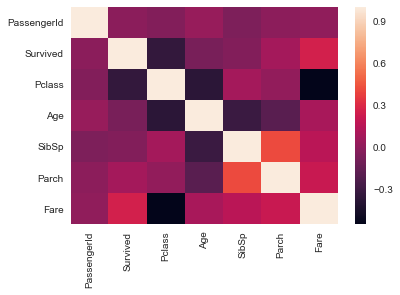

In [11]:
corr = train.corr()
sns.heatmap(corr)

In [12]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [13]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', 
                                                                                     ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', 
                                                                               ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',
                                                                                  ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',
                                                                                  ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


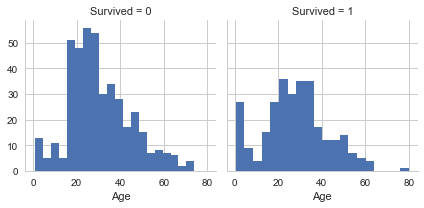

In [17]:
survivorGraph = sns.FacetGrid(train, col='Survived')
survivorGraph.map(plt.hist, 'Age', bins=20)

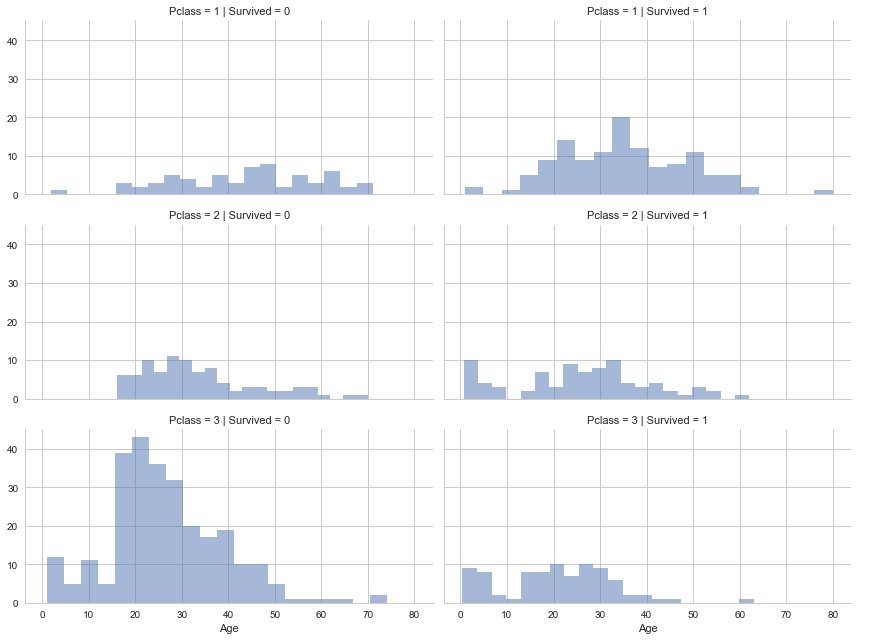

In [18]:
survivedByClass = sns.FacetGrid(train, col='Survived', row='Pclass', size=3.0, aspect=2.0)
survivedByClass.map(plt.hist, 'Age', alpha=.5, bins=20)
survivedByClass.add_legend()

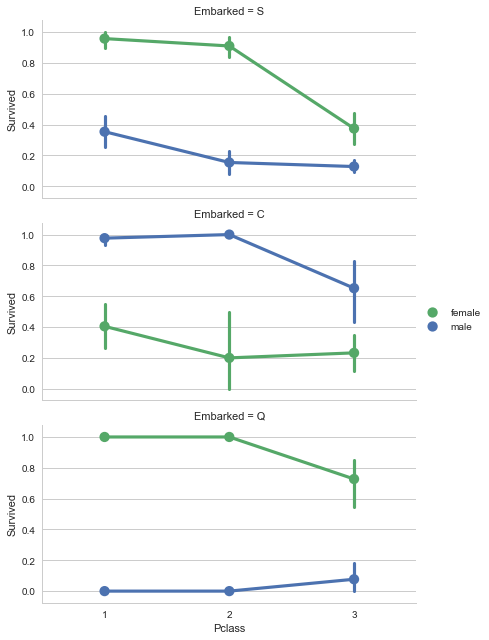

In [19]:
survivedGenderClass = sns.FacetGrid(train, row ='Embarked', size=3.0, aspect=2.0)
survivedGenderClass.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
survivedGenderClass.add_legend()

In [20]:
from sklearn.preprocessing import LabelEncoder

for col in train.columns:
    train[col] = train[col].fillna(-1)
    if train[col].dtype == 'object':
        labelEncoder = LabelEncoder()
        labelEncoder.fit(list(train[col].values))
        train[col] = labelEncoder.transform(list(train[col].values))

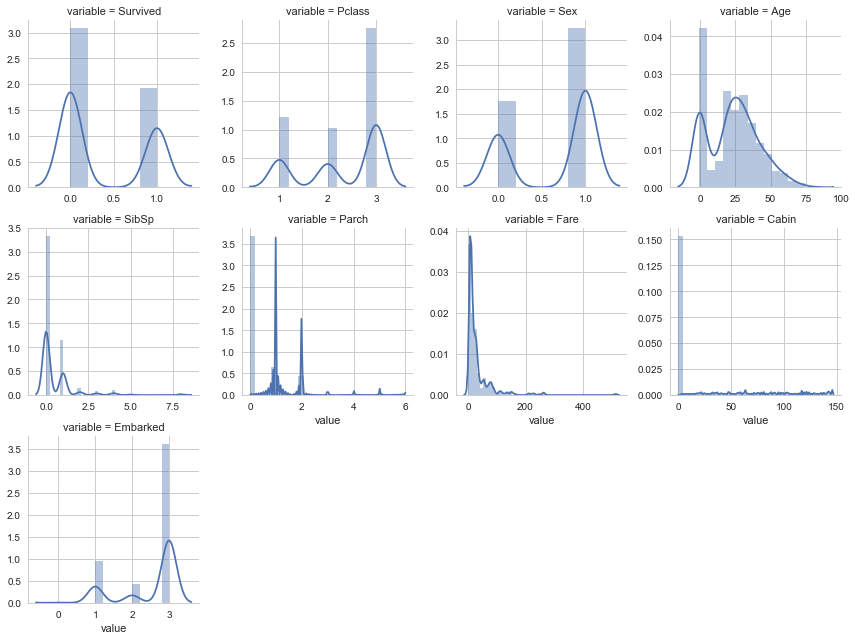

In [21]:
num_plot = [feature for feature in train.columns]
num_plot.remove('PassengerId')
num_plot.remove('Ticket')
num_plot.remove('Name')
num_dim = pd.melt(train, value_vars=num_plot)
num_plot = sns.FacetGrid(num_dim, col='variable', col_wrap=4, sharex=False, sharey=False)
num_plot = num_plot.map(sns.distplot, 'value')

In [22]:
X = train.drop(['Survived', 'Ticket', 'PassengerId'], axis=1)
y = train['Survived'].values

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
import xgboost as xgb

dTrain = xgb.DMatrix(X_train, y_train)
dTest = xgb.DMatrix(X_test, y_test)

params= {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'silent':1
}

C:\Users\knnar\Anaconda3\envs\zestimate\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
watchlist = [(dTrain, 'train'), (dTest, 'test')]
clf = xgb.train(dict(params, silent=1), dTrain, num_boost_round=100, evals=watchlist, early_stopping_rounds=30)

[0]	train-error:0.227528	test-error:0.340782
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 30 rounds.
[1]	train-error:0.160112	test-error:0.284916
[2]	train-error:0.169944	test-error:0.26257
[3]	train-error:0.160112	test-error:0.27933
[4]	train-error:0.146067	test-error:0.240223
[5]	train-error:0.144663	test-error:0.256983
[6]	train-error:0.125	test-error:0.206704
[7]	train-error:0.122191	test-error:0.195531
[8]	train-error:0.110955	test-error:0.201117
[9]	train-error:0.105337	test-error:0.21229
[10]	train-error:0.108146	test-error:0.217877
[11]	train-error:0.110955	test-error:0.217877
[12]	train-error:0.109551	test-error:0.217877
[13]	train-error:0.103933	test-error:0.21229
[14]	train-error:0.106742	test-error:0.21229
[15]	train-error:0.103933	test-error:0.206704
[16]	train-error:0.103933	test-error:0.201117
[17]	train-error:0.102528	test-error:0.21229
[18]	train-error:0.101124	test-error:0.223464


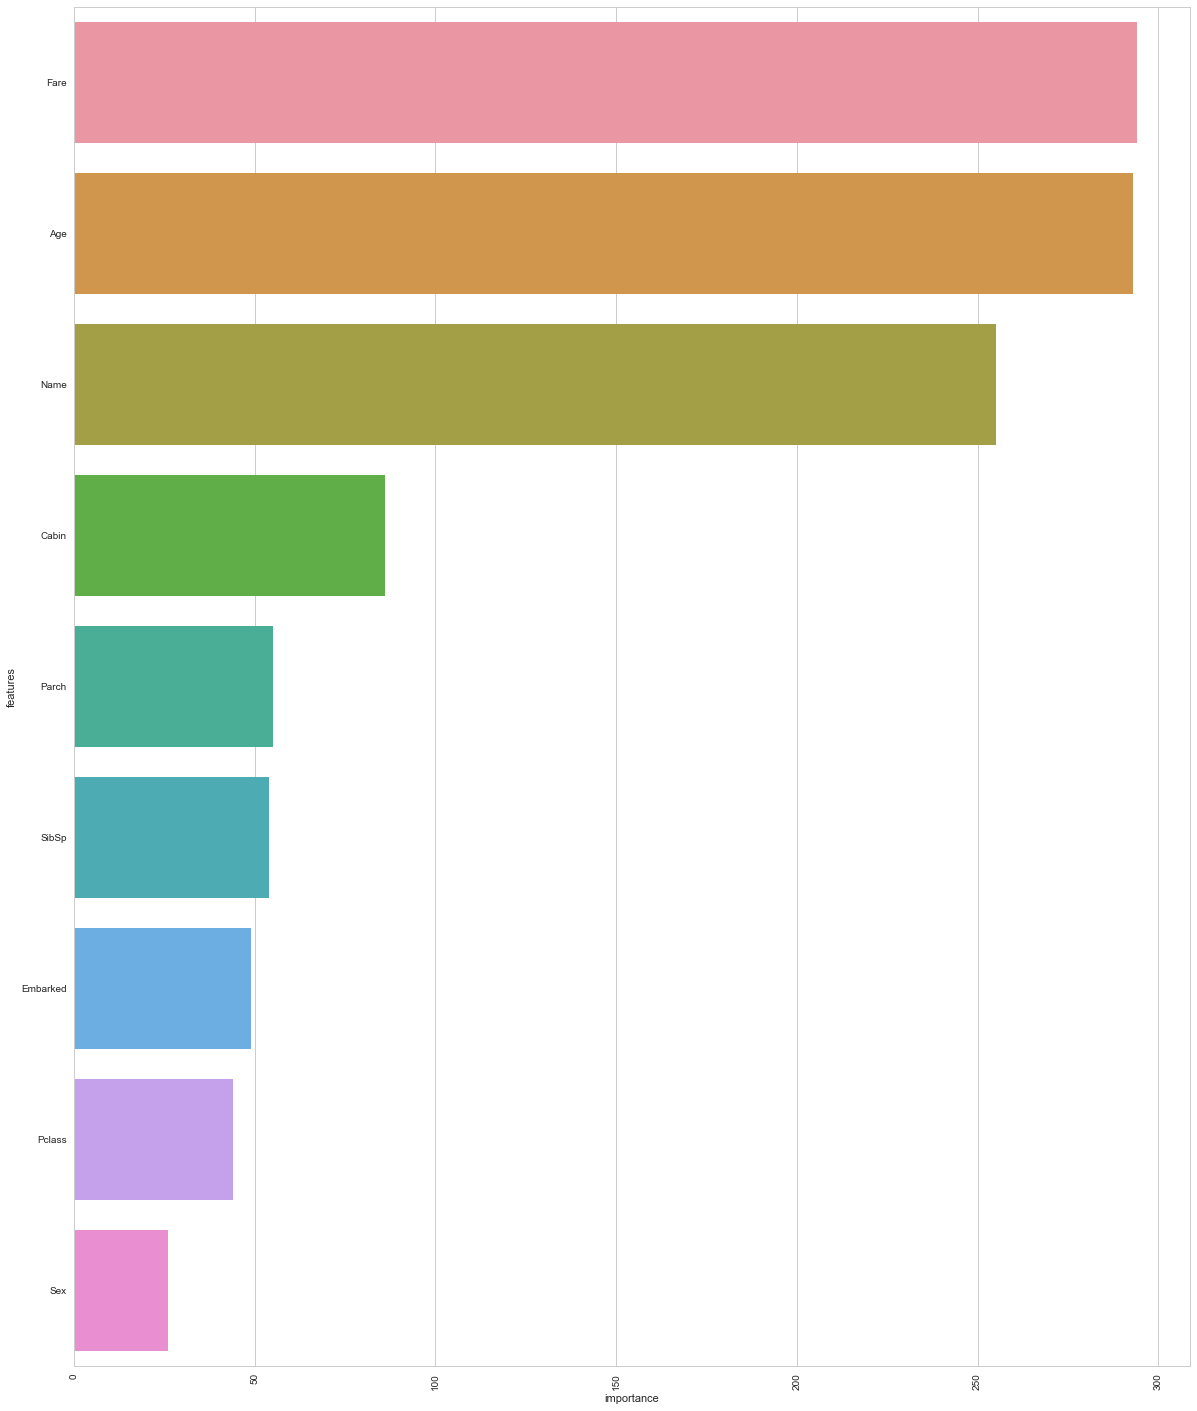

In [26]:
featureImportance = clf.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'], ascending=False, inplace=True)
fig,ax = plt.subplots()
fig.set_size_inches(20,25)
plt.xticks(rotation=90)
sns.barplot(data=features, x="importance", y="features", orient="h")

In [27]:
for col in test.columns:
    test[col] = test[col].fillna(-1)
    if test[col].dtype == 'object':
        labelEncoder = LabelEncoder()
        labelEncoder.fit(list(test[col].values))
        test[col] = labelEncoder.transform(list(test[col].values))

test_xgb = test.drop(['Ticket', 'PassengerId'], axis=1)
dTest = xgb.DMatrix(test_xgb)
predict = clf.predict(dTest)

In [28]:
print(pd.DataFrame(predict).head())

          0
0  0.222075
1  0.387374
2  0.303834
3  0.241999
4  0.507032


In [29]:
for element in predict.flat:
    print(element)

0.222075
0.387374
0.303834
0.241999
0.507032
0.274708
0.428465
0.269313
0.622901
0.194421
0.17562
0.267446
0.869578
0.242447
0.838625
0.633257
0.283801
0.296687
0.394234
0.414619
0.385946
0.331422
0.741073
0.528364
0.78973
0.159969
0.89254
0.24373
0.496105
0.222677
0.187607
0.243966
0.550018
0.641167
0.627244
0.292527
0.443917
0.453544
0.211926
0.485989
0.274437
0.514393
0.172405
0.67727
0.846785
0.22266
0.489598
0.220889
0.839362
0.593045
0.511998
0.217906
0.824501
0.816243
0.259282
0.252599
0.144207
0.367072
0.186821
0.874578
0.226147
0.188732
0.239943
0.617041
0.542816
0.675972
0.702383
0.30615
0.526089
0.734924
0.590709
0.207166
0.560666
0.601059
0.893799
0.657163
0.165826
0.773048
0.200454
0.514808
0.576289
0.391274
0.251772
0.165501
0.285988
0.257838
0.517343
0.521939
0.623338
0.537548
0.414182
0.169391
0.857376
0.18271
0.362648
0.255712
0.849585
0.262906
0.654909
0.146784
0.864246
0.182268
0.237591
0.235172
0.566535
0.234096
0.375646
0.213324
0.177671
0.430734
0.241229
0.626768


In [30]:
predict = np.round_(predict, decimals = 0, out=None)

In [31]:
print(pd.DataFrame(predict).head())

     0
0  0.0
1  0.0
2  0.0
3  0.0
4  1.0


In [32]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],
                          'Survived': predict})
submission.to_csv("submission.csv", index=False)